In [1]:
from functions.correlation_maps import simpleCorrelationMap, correlationMap_1D_v3, correlationMap_2D_v3#, correlationMap_2D, correlationMap_1D,
from functions.loading_and_processing_data import loadMITgcmData, loadTimeSeriesData
from functions.other_functions import computeBuoyancy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/data/hpcdata/users/grejan/mitgcm/') #Make sure we can also import Kaitlins code.
from mitgcm_python_master.grid import ERA5Grid, PACEGrid, Grid, dA_from_latlon, pierre_obs_grid

In [3]:
gp='/data/oceans_output/shelf/kaight/mitgcm/PAS_grid/'
grid = Grid(gp)

/users/kaight/MITgcm/utils/python/MITgcmutils/MITgcmutils/netcdf.py:330: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if hasattr(self, 'mode') and self.mode is 'w':
/users/kaight/MITgcm/utils/python/MITgcmutils/MITgcmutils/netcdf.py:705: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if typecode is not 'c':


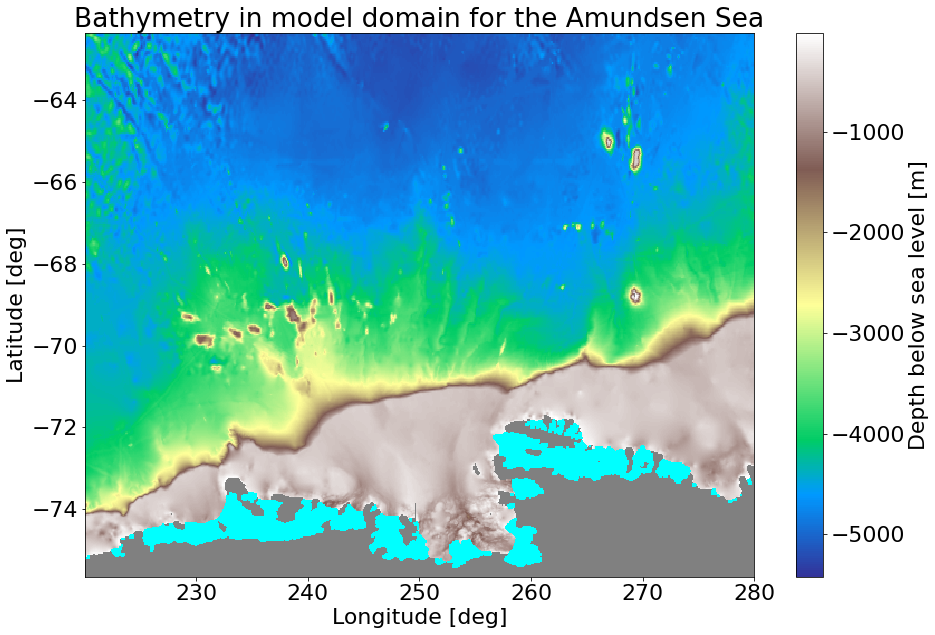

In [4]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,10))
m=np.sum(grid.lat_1d<=-60)
ax=plt.subplot(1,1,1)
bathy=grid.bathy
bathy[grid.land_mask]=np.nan
img=plt.pcolor(grid.lon_2d[:m,:]+360, grid.lat_2d[:m,:], bathy[:m,:], cmap='terrain')
plt.pcolor(grid.lon_2d[:m,:]+360, grid.lat_2d[:m,:], np.where(grid.ice_mask, np.ones(np.shape(grid.ice_mask)), np.nan*np.ones(np.shape(grid.ice_mask)))[:m,:], cmap='cool')
ax.set_facecolor('grey')
plt.colorbar(img, label='Depth below sea level [m]')
plt.ylabel('Latitude [deg]')
plt.xlabel('Longitude [deg]')
plt.title('Bathymetry in model domain for the Amundsen Sea')

plt.savefig('/data/hpcdata/users/grejan/mitgcm/03_output/bathymetry_full.png')

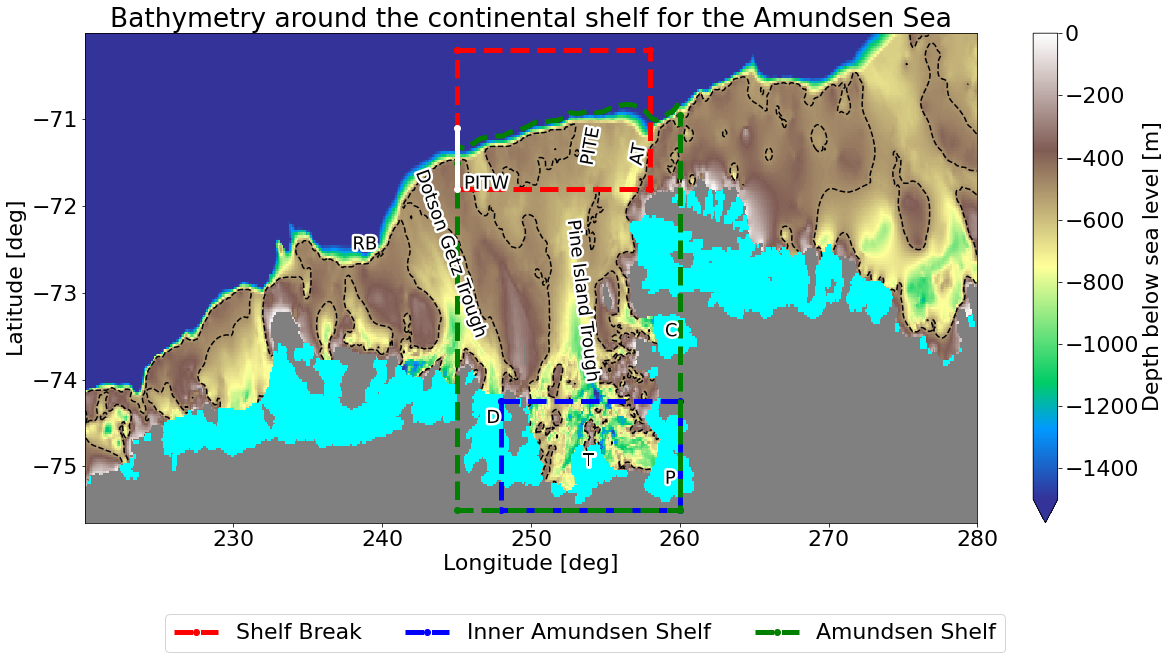

In [44]:
plt.rcParams.update({'font.size': 22})
fig=plt.figure(figsize=(20,10))
m=np.sum(grid.lat_1d<=-70)
ax=plt.subplot(1,1,1)
bathy=grid.bathy
bathy[grid.land_mask]=np.nan
img=plt.pcolor(grid.lon_2d[:m,:]+360, grid.lat_2d[:m,:], bathy[:m,:], cmap='terrain', vmax=0, vmin=-1500)
plt.pcolor(grid.lon_2d[:m,:]+360, grid.lat_2d[:m,:], np.where(grid.ice_mask, np.ones(np.shape(grid.ice_mask)), np.nan*np.ones(np.shape(grid.ice_mask)))[:m,:], cmap='cool')
ax.set_facecolor('grey')
plt.colorbar(img, label='Depth below sea level [m]', extend='min')
plt.ylabel('Latitude [deg]')
plt.xlabel('Longitude [deg]')
plt.title('Bathymetry around the continental shelf for the Amundsen Sea')

bathy[grid.ice_mask]=np.nan
bath=plt.contour(grid.lon_2d[:m,:]+360, grid.lat_2d[:m,:], bathy[:m,:], levels=[-500], colors=['black'])
#plt.clabel(bath, [-500], fontsize)


fs=18
import matplotlib.patheffects as PathEffects
txt=plt.text(x=252.2, y=-74, s='Pine Island Trough', rotation=277, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=242, y=-73.5, s='Dotson Getz Trough', rotation=290, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=245.5, y=-71.8, s='PITW', rotation=0, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=253.2, y=-71.5, s='PITE', rotation=80, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=256.5, y=-71.5, s='AT', rotation=80, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=238, y=-72.5, s='RB', rotation=0, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

txt=plt.text(x=259, y=-75.2, s='P', rotation=0, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=253.5, y=-75.0, s='T', rotation=0, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=247, y=-74.5, s='D', rotation=0, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])
txt=plt.text(x=259, y=-73.5, s='C', rotation=0, fontsize=fs)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

#PITE BOX
plt.plot([360-115, 360-102, 360-102, 360-115, 360-115], [-70.2, -70.2, -71.8, -71.8, -70.2], 'ro--' , lw=5, label='Shelf Break')

#INNER SHELF
plt.plot([360-112, 360-100, 360-100, 360-112, 360-112], [-74.25, -74.25, -75.5, -75.5, -74.25], 'bo--', lw=5, label='Inner Amundsen Shelf')

#FULL SHELF
plt.plot([360-115, 360-115, 360-100, 360-100], [-71.5, -75.5, -75.5, -70.95], 'go--', lw=5, label='Amundsen Shelf')
m=np.sum(grid.lat_1d<=-70)
n=(grid.lon_1d>-115) & (grid.lon_1d<-100)
bath=plt.contour(grid.lon_2d[:m,n]+360, grid.lat_2d[:m,n], bathy[:m,n], levels=[-1750], colors=['g'], linewidths=[5])

#CROSS SECTION
plt.plot([360-115, 360-115], [-71.8, -71.1], 'wo-', lw=5)

fig.subplots_adjust(bottom=0.2)
fig.legend(loc='lower center', ncol=3)
plt.savefig('/data/hpcdata/users/grejan/mitgcm/03_output/bathymetry_shelf.png')